# Tarea 1A
***Autores:** Pablo Montes, Joaquín Pelle y Oscar Reula*
### Importante 1: ###
Este notebook está diseñado para ejecutar en Julia.

### Importante 2: ###
Renombre el archivo como (según corresponda): 
**apellido_nombre_tarea_1.ipynb** o **grupo_tarea_1.ipynb**

**Todo el código generado y la presentación deberá estar incluida en este notebook.**

**Antes de entregar, serciorese que todas las variables estén bien definidas, para ello interrumpa el kernel y corra todo desde cero.**

**El objetivo de las primeras tareas (A y B) es variado:**

1. Construir algunos integradores simples y aplicarlos a problemas en 1 y 2 dimensiones.
2. Estudiar convergencia y determinar el factor Q del método.
3. Estudia la región de convergencia de los métodos.
4. Comprobar cualitativa y cuantitativamente los errores de la aproximación.
5. Familiarizarse con las librerías de integradores de ODEs.
6. Familiarizarse con el manejo y estudio de soluciones para casos de complejidad media.
7. Estudiar el caso stiff y los métodos IMEX.

**1)** La ecuación diferencial

$$
\frac{dy}{dt} = \lambda y
$$

tiene como solución la función 
$$ y(t) = y_0e^{\lambda t}, $$
donde $y_0$ es una constante que depende del dato inicial, es el valor de $y(t)$ en $t=0$.

Buscamos una aproximación numérica utilizando el *método de Euler*,
$$y(t+\Delta t) \approx y(t) + \Delta t \dfrac{dy}{dt}(t) = y(t) + \Delta t \lambda y(t)$$
tomando $\lambda = 2$ y dato inicial $y(0) = 1$ en el intervalo de tiempo $[0,2]$.


**Implementación del método:**

Una forma simple de implementar el método de Euler sería la siguiente
```julia
#Datos iniciales
λ = 2
y0 = 1
#Cantidad de pasos temporales y dt
Tfin = 2.0
N = 201
dt = Tfin/(N-1)

#Vectores donde guardamos la solución
tiempos = zeros(N)
y = zeros(N)
#Asignamos el dato inicial
y[1] = y0
#Evolución temporal usando el método de Euler
for i in 2:N
    tiempos[i] = dt*(i-1)      #Actualizamos el valor de t
    y[i] = y[i-1] + dt*λ*y[i-1]  #Hacemos un paso de Euler
end
```


In [4887]:
# Librerías utilizadas
using Plots
using LinearAlgebra

Lo que haremos es partir este procedimiento en algunas funciones pequeñas, de manera que cuando en el futuro queramos cambiar de método numérico, o resolver otra ecuación diferencial, esto se pueda hacer de manera directa. Las funciones que usaremos están en el archivo ``myODEfunctions.jl``

In [4888]:
include("myODEfunctions.jl")

myODEsolver (generic function with 1 method)

Nuestra implementación del método de Euler entonces será la siguiente: (esto será similar a la librería `DifferentialEquations.jl` que usaremos más adelante)

In [4889]:
#1) Datos del problema:

CrecimientoExponencial(y, t, λ) = λ*(y) # Definimos el término derecho de la ODE
y0 = 1.0                                # Datos iniciales
T = (0.0, 4.0)                          # Intervalo temporal
λ = 2.;par = (λ)                        # Parámetros del problema (dentro de una tupla)

#Guardamos los datos en la variable "prob"
prob = myODEproblem(CrecimientoExponencial, y0, T, par)

(CrecimientoExponencial, 1.0, (0.0, 4.0), 2.0)

Elegimos una cantidad de pasos temporales apropiados y resolvemos:

In [4890]:
N = 101; # Cantidad de pasos temporales
# Resolvemos el problema "prob" usando el método "EulerStep" 
dt = (T[2]-T[1])/(N-1); # discretizando con N pasos (dt = (Tfin-Tini)/(N-1))
t, y = myODEsolver(prob, EulerStep, dt = dt);

Una vez obtenida la solución la graficamos.

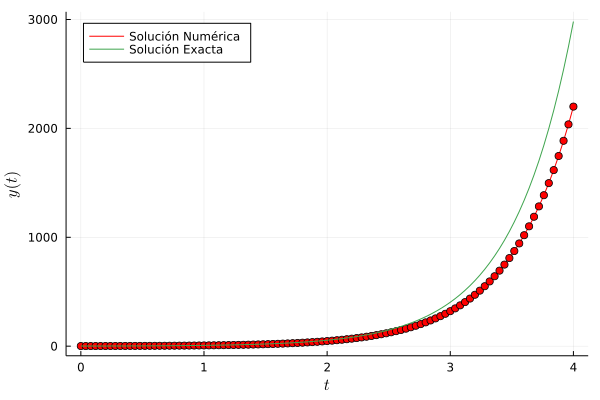

In [4891]:
plt=plot();
plot!(plt, t, y, color = :red, label = "Solución Numérica");
scatter!(plt, t, y, color = :red, label = "");
plot!(plt, t, y0*exp.(λ*t), label = "Solución Exacta");
plot!(ylabel = "\$y(t)\$", xlabel = "\$t\$");
plot!(plt, legend = :topleft)

### Problema 1: ###

***1a)*** Juegue con distintos valores de `dt` (`N`) y datos iniciales. Vea qué sucede a medida que aumenta o disminuye `dt`. 

In [4892]:
CrecimientoExponencial(y,t,λ)=λ*(y); # Definimos el término derecho de la ODE
T = (0.0, 5.0);                      # Intervalo temporal
N=2^10;                              # number of time intervals 2^10=1024
dt=(T[2]-T[1])/(N-1);                # time step

Para $\Delta {t}$ fijo, tomamos distintos datos inicales $(y_{0},\lambda)$. Primero variando $y(0)$ (manteniendo fijo $\lambda$) y luego variando $\lambda$ (manteniendo fijo $y(0)$)

In [4893]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### VARIANDO solo y0
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
λ =1.0;par=(λ);

y0=1.0;                                             # Parámetros del problema (dentro de una tupla)
prob=myODEproblem(CrecimientoExponencial,y0,T,par); # Definimos el problema
t,y_01=myODEsolver(prob,EulerStep,dt=dt);           # Integramos la solución
y_exact_01=y0*exp.(λ*t);                            # Solución exacta

y0=2.0;                                             # Parámetros del problema (dentro de una tupla)
prob=myODEproblem(CrecimientoExponencial,y0,T,par); # Definimos el problema
t,y_02=myODEsolver(prob,EulerStep,dt=dt);           # Integramos la solución
y_exact_02=y0*exp.(λ*t);                            # Solución exacta

y0=3.0;                                             # Parámetros del problema (dentro de una tupla)
prob=myODEproblem(CrecimientoExponencial,y0,T,par); # Definimos el problema
t,y_03=myODEsolver(prob,EulerStep,dt=dt);           # Integramos la solución
y_exact_03=y0*exp.(λ*t);                            # Solución exacta

In [4894]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### VARIANDO solo λ
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
y0=1.0;

λ =2.0;par=(λ);                                     # Parámetros del problema (dentro de una tupla)
prob=myODEproblem(CrecimientoExponencial,y0,T,par); # Definimos el problema
t,y_04=myODEsolver(prob,EulerStep,dt=dt);           # Integramos la solución
y_exact_04=y0*exp.(λ*t);                            # Solución exacta

λ =3.0;par=(λ);                                     # Parámetros del problema (dentro de una tupla)
prob=myODEproblem(CrecimientoExponencial,y0,T,par); # Definimos el problema
t,y_05=myODEsolver(prob,EulerStep,dt=dt);           # Integramos la solución
y_exact_05=y0*exp.(λ*t);                            # Solución exacta

### Ploteamos los resultados

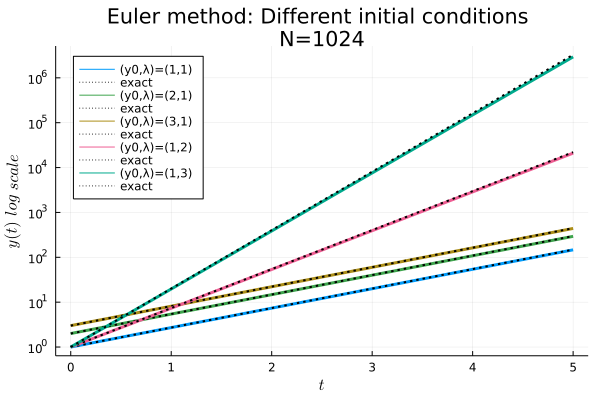

In [4895]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### PLOTEAMOS LOS RESULTADOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt = plot(yaxis=:log);
plot!(plt,t,y_01,label="(y0,λ)=(1,1)",lw=3);
plot!(plt,t,y_exact_01,label="exact",line=(:dot,2),color="black");
plot!(plt,t,y_02,label="(y0,λ)=(2,1)",lw=3);
plot!(plt,t,y_exact_02,label="exact",line=(:dot,2),color="black");
plot!(plt,t,y_03,label="(y0,λ)=(3,1)",lw=3);
plot!(plt,t,y_exact_03,label="exact",line=(:dot,2),color="black");
plot!(plt,t,y_04,label="(y0,λ)=(1,2)",lw=3);
plot!(plt,t,y_exact_04,label="exact",line=(:dot,2),color="black");
plot!(plt,t,y_05,label="(y0,λ)=(1,3)",lw=3);
plot!(plt,t,y_exact_05,label="exact",line=(:dot,2),color="black");
plot!(ylabel="\$y(t)\$ \$log\$ \$scale\$",xlabel="\$t\$",title="Euler method: Different initial conditions \n N=1024 ");
plot!(plt,legend=:topleft)

 Ahora para unos datos inicales $(y_{0},\lambda)$ fijos, tomamos distintos valores de $\Delta {t}$

In [4896]:
T = (0.0, 100.0);                                   # Intervalo temporal
y0=5.0;λ =2.0;par=(λ);                              # condiciones iniciales
prob=myODEproblem(CrecimientoExponencial,y0,T,par); # Definimos el problema

In [4897]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### VARIANDO dt (ó N)
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=2^9;dt=(T[2]-T[1])/(N-1);                  # number of time intervals and time step
t_01,y_01=myODEsolver(prob,EulerStep,dt=dt); # Integramos la solución

N=2^10;dt=(T[2]-T[1])/(N-1);                 # number of time intervals and time step
t_02,y_02=myODEsolver(prob,EulerStep,dt=dt); # Integramos la solución

N=2^11;dt=(T[2]-T[1])/(N-1);                 # number of time intervals and time step
t_03,y_03=myODEsolver(prob,EulerStep,dt=dt); # Integramos la solución

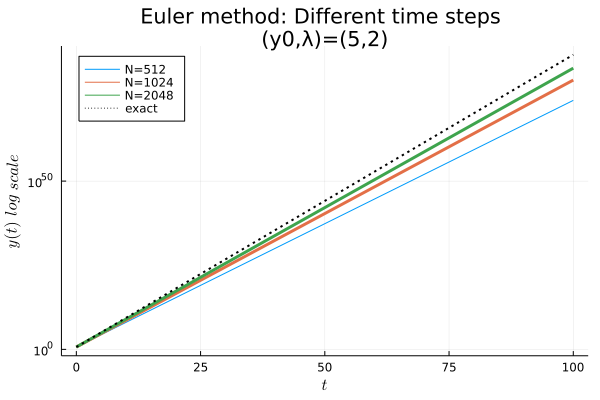

In [4898]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### PLOTEAMOS LOS RESULTADOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt = plot(yaxis=:log);
plot!(plt,t_01,y_01,label="N=512");
plot!(plt,t_02,y_02,label="N=1024",lw=3);
plot!(plt,t_03,y_03,label="N=2048",lw=3);
plot!(plt,t_01,y0*exp.(λ*t_01),label="exact",line=(:dot,2),color="black");
plot!(ylabel="\$y(t)\$ \$log\$ \$scale\$",xlabel="\$t\$",title="Euler method: Different time steps \n (y0,λ)=(5,2) ");
plot!(plt,legend=:topleft)

***1b)*** ¿Cómo se comporta el sistema si $\lambda$ y/o $y_0$ son números complejos?. Pruebe con $\lambda$ imaginario. Grafique. 

*Pista 1: Un número complejo $c = a + bi$ se define en julia como como `c = a + bim`. Las funciones `real(c)` e `imag(c)` retornan `a` y `b` respectivamente.*

*Pista 2: Si toma $\lambda$ complejo, también debe tomar el dato inicial como número complejo, aunque sea real, por ejemplo $y_0 = 1.0 + 0.0im$*

In [4899]:
y0=(1.0+0.0*im);                                    # Datos iniciales
T=(0.0,10.0);                                       # Intervalo temporal
λ=(1.0*im);par=(λ);                                 # Parámetros del problema (dentro de una tupla)
prob=myODEproblem(CrecimientoExponencial,y0,T,par); # definimos el problema

In [4900]:
N=101;                                 # Cantidad de pasos temporales
dt=(T[2]-T[1])/(N-1);                  # discretizando con N pasos (dt = (Tfin-Tini)/(N-1))
t,y=myODEsolver(prob,EulerStep,dt=dt); # resolvemos usando método de Euler

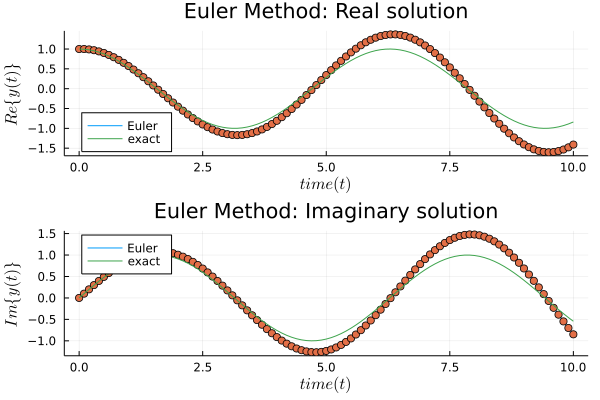

In [4901]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### PLOTEAMOS PARTE REAL DE LA SOLUCIÓN
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt1=plot();
plot1=plot!(plt1,t,real(y),label="Euler");
plot1=scatter!(plt1,t,real(y),label="");
plot1=plot!(plt1,t,real(y0*exp.(λ*t)), label = "exact");
plot1=plot!(ylabel="\$ Re \\{ y(t) \\} \$",xlabel="\$time (t)\$");
plot1=plot!(plt1,legend=:bottomleft,title="Euler Method: Real solution");

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### PLOTEAMOS PARTE IMAGINARIA DE LA SOLUCIÓN
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt2=plot();
plot2=plot!(plt2,t,imag(y),label="Euler");
plot2=scatter!(plt2,t,imag(y),label="");
plot2=plot!(plt2,t,imag(y0*exp.(λ*t)),label="exact");
plot2=plot!(ylabel="\$ Im \\{ y(t) \\} \$",xlabel="\$time (t)\$");
plot2=plot!(plt2,legend=:topleft,title="Euler Method: Imaginary solution");

plot!(plot1,plot2,layout=(2,1))

***1c)*** Utilice varios N para calcular el factor $Q$ del método de Euler.

In [4902]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### DEFINIMOS PARÁMETROS INICALES
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
y0=(1.0+0.0*im);         # Datos iniciales
T=(0.0,5.0);                      # Intervalo temporal
λ=(1.0*im);par=(λ);

In [4903]:
prob=myODEproblem(CrecimientoExponencial,y0,T,par); # definimos el problema

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=16 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=16;dt=(T[2]-T[1])/(N-1);                      # cantidad de pasos temporales (para N pasos)
t1_N1,y1_N1=myODEsolver(prob,EulerStep,dt=dt);  # integramos la solución con método de Euler (para N pasos)
N=(2*N-1);dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para 2N pasos)
t1_N2,y1_N2=myODEsolver(prob,EulerStep,dt=dt);  # integramos la solución con método de Euler (para 2N pasos)
N=(4*N-3);dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para 4N pasos)
t1_N3,y1_N3=myODEsolver(prob,EulerStep,dt=dt);  # integramos la solución con método de Euler (para 4N pasos)

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=32 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=32;dt=(T[2]-T[1])/(N-1);                      # cantidad de pasos temporales (para N pasos)
t2_N1,y2_N1=myODEsolver(prob,EulerStep,dt=dt);  # integramos la solución con método de Euler (para N pasos)
N=(2*N-1);dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para 2N pasos)
t2_N2,y2_N2=myODEsolver(prob,EulerStep,dt=dt);  # integramos la solución con método de Euler (para 2N pasos)
N=(4*N-3);dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para 4N pasos)
t2_N3,y2_N3=myODEsolver(prob,EulerStep,dt=dt);  # integramos la solución con método de Euler (para 4N pasos)

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=64 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=64;dt=(T[2]-T[1])/(N-1);                      # cantidad de pasos temporales (para N pasos)
t3_N1,y3_N1=myODEsolver(prob,EulerStep,dt=dt);  # integramos la solución con método de Euler (para N pasos)
N=(2*N-1);dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para 2N pasos)
t3_N2,y3_N2=myODEsolver(prob,EulerStep,dt=dt);  # integramos la solución con método de Euler (para 2N pasos)
N=(4*N-3);dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para 4N pasos)
t3_N3,y3_N3=myODEsolver(prob,EulerStep,dt=dt);  # integramos la solución con método de Euler (para 4N pasos)


### Función para calcular el factor $Q$ (presition quotient)

Según la definición del factor $Q$ podremos calcularlo de la siguiente manera:

\begin{equation}
    Q_{exact}=\frac{\left[y_{aprox}(\Delta t,N_1)-y_{exact}\right]}
    {\left[y_{aprox}(\Delta t/2,N_2)-y_{exact}\right]}
\end{equation}

sin embargo, esta forma de calculo requiere el conocimiento de la solución exacta, lo cual en la mayoría de los problemas reales es imposible. Por ello, se calcula una estimación del factor $Q$ haciendo uso de las soluciones aproximadas según un determinado método, es decir:

\begin{equation}
    Q_{aprox}=\frac{\left[y_{aprox}(\Delta t,N_1)-y_{aprox}(\Delta t/2,N_2) \right]}
    {\left[y_{aprox}(\Delta t/2,N_2)-y_{aprox}(\Delta t/4,N_3) \right]}
\end{equation}

In [4904]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### FUNCIÓN PARA CALCULAR EL FACTOR Q (sin requerir solución exacta)
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Método 1
function Q_factor(sol_n,sol_2n,sol_4n)
    Q=zero(copy(real(sol_n)));      # factor Q inicializado a cero
    sol2n=copy(sol_2n[1:2:end]);    # creamos sol2n con misma dimension que sol_n
    sol4n=copy(sol_4n[1:4:end]);    # creamos sol4n con misma dimension que sol_n
    for i in 1:length(sol_n)
        Q[i]=norm(sol_n[i]-sol2n[i],2)/norm(sol2n[i]-sol4n[i],2); # usamos norma L2
    end
    return Q
end

# Método 2
function Q(index,sol_1,sol_2,sol_4)
    sol2=copy(sol_2[1:2:end]);    # creamos sol2n con misma dimension que sol_n
    sol4=copy(sol_4[1:4:end]);    # creamos sol4n con misma dimension que sol_n
    return norm(sol_1[index] - sol2[index],2)/norm(sol2[index]-sol4[index],2)
end


Q (generic function with 1 method)

In [4905]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### FUNCIÓN PARA CALCULAR EL FACTOR Q (requiriendo solución exacta)
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

function y_exact(λ,y0,t)
    return y0*exp.(λ*t);
end

function Q_factor_exact(function_name,sol_n,sol_2n,time_vector,λ,y0)
    sol2n=copy(sol_2n[1:2:end]);    # creamos sol2n con misma dimension que sol_n
    Q=[norm(sol_n[i]-function_name(λ,y0,time_vector[i]))/norm(sol2n[i]-function_name(λ,y0,time_vector[i])) for i in 1:length(time_vector)];
    return Q
end

Q_factor_exact (generic function with 1 method)

Ploteamos las soluciones (al menos su parte real) para asegurarnos de que la soluciones dan bien.

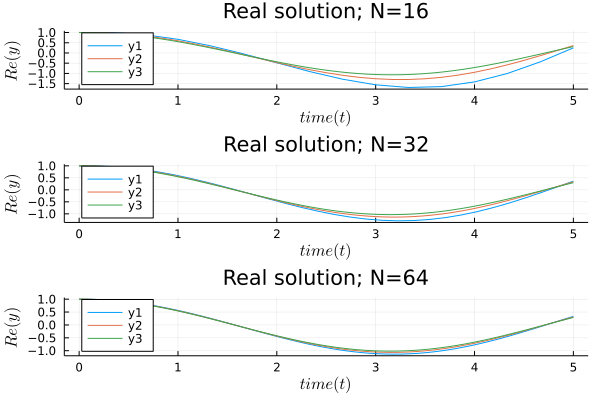

In [4906]:
plt_y1=plot(title="Real solution; N=16");
plot_y1=plot!(plt_y1,t1_N1,real(y1_N1));
plot_y1=plot!(plt_y1,t1_N2,real(y1_N2));
plot_y1=plot!(plt_y1,t1_N3,real(y1_N3));

plt_y2=plot(title="Real solution; N=32");
plot_y2=plot!(plt_y2,t2_N1,real(y2_N1));
plot_y2=plot!(plt_y2,t2_N2,real(y2_N2));
plot_y2=plot!(plt_y2,t2_N3,real(y2_N3));

plt_y3=plot(title="Real solution; N=64");
plot_y3=plot!(plt_y3,t3_N1,real(y3_N1));
plot_y3=plot!(plt_y3,t3_N2,real(y3_N2));
plot_y3=plot!(plt_y3,t3_N3,real(y3_N3));

plot!(plt_y1,plt_y2,plt_y3,layout=(3,1),legend=:topleft,ylabel="\$Re(y)\$",xlabel="\$time (t)\$")


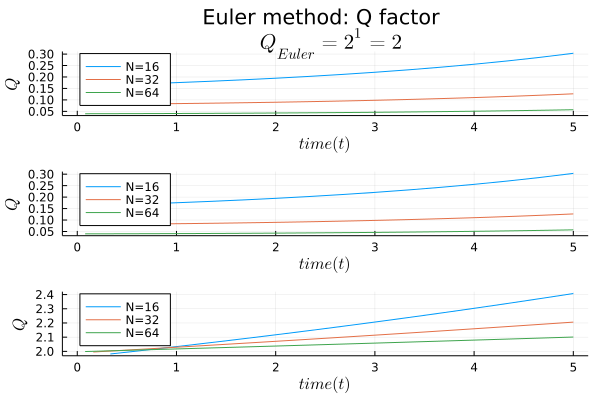

In [4907]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### PLOTEAMOS LOS RESULTADOS PARA DISTINTOS N - 1ER MÉTODO
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt1=plot();
plot1=plot!(plt1,t1_N1,Q_factor(y1_N1,y1_N2,y1_N3),label="N=16");
plot1=plot!(plt1,t2_N1,Q_factor(y2_N1,y2_N2,y2_N3),label="N=32");
plot1=plot!(plt1,t3_N1,Q_factor(y3_N1,y3_N2,y3_N3),label="N=64");
plot1=plot!(ylabel="\$Q\$",xlabel="\$time (t)\$",title="Euler method: Q factor \n  \$Q_{Euler}=2^{1}=2 \$");

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### PLOTEAMOS LOS RESULTADOS PARA DISTINTOS N - 2DO MÉTODO
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt2=plot();
plot2=plot!(plt2,t1_N1,map(index -> Q(index,y1_N1,y1_N2,y1_N3),[i for i in 1:length(t1_N1)]),label="N=16");
plot2=plot!(plt2,t2_N1,map(index -> Q(index,y2_N1,y2_N2,y2_N3),[i for i in 1:length(t2_N1)]),label="N=32");
plot2=plot!(plt2,t3_N1,map(index -> Q(index,y3_N1,y3_N2,y3_N3),[i for i in 1:length(t3_N1)]),label="N=64");
plot2=plot!(ylabel="\$Q\$",xlabel="\$time (t)\$");

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### PLOTEAMOS LOS RESULTADOS PARA DISTINTOS N - 3ER MÉTODO
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt3=plot();
plot3=plot!(plt3,t1_N1,Q_factor_exact(y_exact,y1_N1,y1_N2,t1_N1,par,y0),label="N=16");
plot3=plot!(plt3,t2_N1,Q_factor_exact(y_exact,y2_N1,y2_N2,t2_N1,par,y0),label="N=32");
plot3=plot!(plt3,t3_N1,Q_factor_exact(y_exact,y3_N1,y3_N2,t3_N1,par,y0),label="N=64");
plot3=plot!(ylabel="\$Q\$",xlabel="\$time (t)\$");

plot!(plot1,plot2,plot3,layout=(3,1),legend=:topleft)

***1d)***
Usando $\lambda = 1, y_0 = 1$, implemente los métodos de Runge-Kutta de orden 2 y 4 creando dos funciones llamadas `RK2step` y `RK4step`, similares a `EulerStep`. Vuelva a graficar para distintos $N$ y calcule el factor $Q$ para estos métodos. Nota: para RK2 puede usar el que se llama *método de Heum* o el que se denomina *método de Euler Mejorado*, o ambos (con nombres distintos).

***Ayuda:** Primero defina las funciones en una celda y pruébelas hasta estar seguro que están funcionando correctamente. Sólo cuando esté seguro cópielas a el archivo  ``myODEfunctions.jl``. Es más eficiente y cómodo trabajar en el notebook!*

In [4910]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### DEFINIMOS PARÁMETROS INICALES
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
y0=1.0;        # Datos iniciales
T=(0.0,25.0);  # Intervalo temporal
λ=1.0;par=(λ); # Parámetros del problema (dentro de una tupla)
prob=myODEproblem(CrecimientoExponencial,y0,T,par); # definimos el problema

In [4911]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### USAMOS METODO DE RK2 MÉTODO DE HEUN
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=16 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=16;dt=(T[2]-T[1])/(N-1);                      # cantidad de pasos temporales (para N pasos)
t1_N1,y1_N1=myODEsolver(prob,RK2step_Heun,dt=dt);  # integramos la solución con método de RK2_Heun (para N pasos)
N=(2*N-1);dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para 2N pasos)
t1_N2,y1_N2=myODEsolver(prob,RK2step_Heun,dt=dt);  # integramos la solución con método de RK2_Heun (para 2N pasos)
N=(4*N-3);dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para 4N pasos)
t1_N3,y1_N3=myODEsolver(prob,RK2step_Heun,dt=dt);  # integramos la solución con método de RK2_Heun (para 4N pasos)

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=32 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=32;dt=(T[2]-T[1])/(N-1);                      # cantidad de pasos temporales (para N pasos)
t2_N1,y2_N1=myODEsolver(prob,RK2step_Heun,dt=dt);  # integramos la solución con método de RK2_Heun (para N pasos)
N=(2*N-1);dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para 2N pasos)
t2_N2,y2_N2=myODEsolver(prob,RK2step_Heun,dt=dt);  # integramos la solución con método de RK2_Heun (para 2N pasos)
N=(4*N-3);dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para 4N pasos)
t2_N3,y2_N3=myODEsolver(prob,RK2step_Heun,dt=dt);  # integramos la solución con método de RK2_Heun (para 4N pasos)

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=64 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=64;dt=(T[2]-T[1])/(N-1);                      # cantidad de pasos temporales (para N pasos)
t3_N1,y3_N1=myODEsolver(prob,RK2step_Heun,dt=dt);  # integramos la solución con método de RK2_Heun (para N pasos)
N=(2*N-1);dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para 2N pasos)
t3_N2,y3_N2=myODEsolver(prob,RK2step_Heun,dt=dt);  # integramos la solución con método de RK2_Heun (para 2N pasos)
N=(4*N-3);dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para 4N pasos)
t3_N3,y3_N3=myODEsolver(prob,RK2step_Heun,dt=dt);  # integramos la solución con método de RK2_Heun (para 4N pasos)

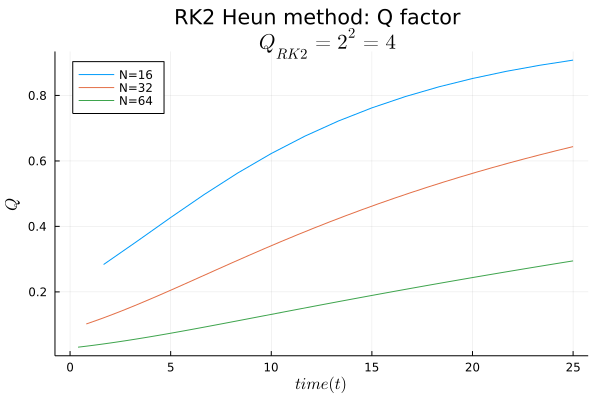

In [4912]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### PLOTEAMOS LOS RESULTADOS PARA DISTINTOS N
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt=plot();
plot!(plt,t1_N1,Q_factor(y1_N1,y1_N2,y1_N3),label="N=16");
plot!(plt,t2_N1,Q_factor(y2_N1,y2_N2,y2_N3),label="N=32");
plot!(plt,t3_N1,Q_factor(y3_N1,y3_N2,y3_N3),label="N=64");
plot!(ylabel="\$Q\$",xlabel="\$time (t)\$");
plot!(plt, legend = :topleft, title = "RK2 Heun method: Q factor \n  \$Q_{RK2}=2^{2}=4 \$")

In [4913]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### USAMOS METODO DE RK4
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=101 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=512;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para N pasos)
t_N1,y_N1=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N2,y_N2=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N3,y_N3=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=1024 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=1024;dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para N pasos)
t_N4,y_N4=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N5,y_N5=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N6,y_N6=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=2048 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=2048;dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para N pasos)
t_N7,y_N7=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N8,y_N8=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N9,y_N9=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

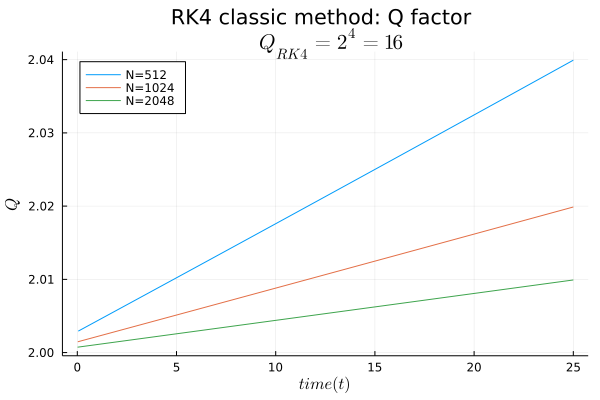

In [4914]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### PLOTEAMOS LOS RESULTADOS PARA DISTINTOS N
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt=plot()
plot!(plt,t_N1,Q_factor(y_N1,y_N2,y_N3),label="N=512")
plot!(plt,t_N4,Q_factor(y_N4,y_N5,y_N6),label="N=1024")
plot!(plt,t_N7,Q_factor(y_N7,y_N8,y_N9),label="N=2048")
plot!(ylabel="\$Q\$",xlabel="\$time (t)\$")
plot!(plt, legend = :topleft, title = "RK4 classic method: Q factor \n  \$Q_{RK4}=2^{4}=16 \$")

***1e)*** Repita el punto anterior para $\lambda = i$ y $y_0 = 1$. ¿Qué diferencia ve entre los métodos? 

In [4915]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### DEFINIMOS PARÁMETROS INICALES
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
y0=1.0+0.0*im;        # Datos iniciales
T=(0.0,10.0);         # Intervalo temporal
λ=0.0+1.0*im;par=(λ); # Parámetros del problema (dentro de una tupla)
prob=myODEproblem(CrecimientoExponencial,y0,T,par); # definimos el problema

In [4916]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### USAMOS METODO DE RK2 MÉTODO DE HEUN
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=101 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=512;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para N pasos)
t_N1,y_N1=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N2,y_N2=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N3,y_N3=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=1024 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=1024;dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para N pasos)
t_N4,y_N4=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N5,y_N5=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N6,y_N6=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=2048 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=2048;dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para N pasos)
t_N7,y_N7=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N8,y_N8=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N9,y_N9=myODEsolver(prob,RK2step_Heun,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

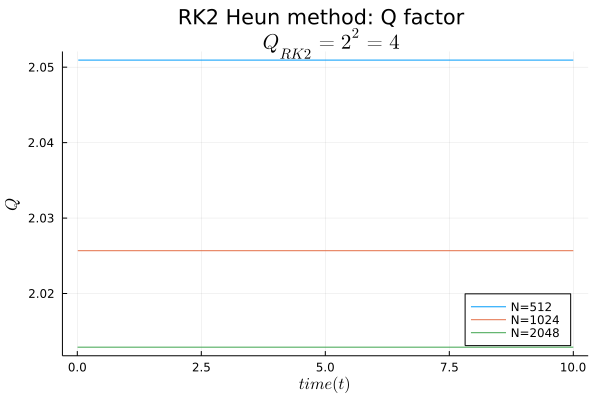

In [4917]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### PLOTEAMOS LOS RESULTADOS PARA DISTINTOS N
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt=plot()
plot!(plt,t_N1,Q_factor(y_N1,y_N2,y_N3),label="N=512")
plot!(plt,t_N4,Q_factor(y_N4,y_N5,y_N6),label="N=1024")
plot!(plt,t_N7,Q_factor(y_N7,y_N8,y_N9),label="N=2048")
plot!(ylabel="\$Q\$",xlabel="\$time (t)\$")
plot!(plt,legend=:bottomright,title="RK2 Heun method: Q factor \n  \$Q_{RK2}=2^{2}=4 \$")

In [4918]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### USAMOS METODO DE RK4
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=101 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=512;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para N pasos)
t_N1,y_N1=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N2,y_N2=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N3,y_N3=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=1024 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=1024;dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para N pasos)
t_N4,y_N4=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N5,y_N5=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N6,y_N6=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### CALCULAMOS SOLUCIÓN PARA N=2048 PASOS
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
N=2048;dt=(T[2]-T[1])/(N-1);                 # cantidad de pasos temporales (para N pasos)
t_N7,y_N7=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 2N pasos)
t_N8,y_N8=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 2N pasos)
N=2*N;dt=(T[2]-T[1])/(N-1);                  # cantidad de pasos temporales (para 4N pasos)
t_N9,y_N9=myODEsolver(prob,RK4step,dt=dt); # integramos la solución con método de Euler (para 4N pasos)

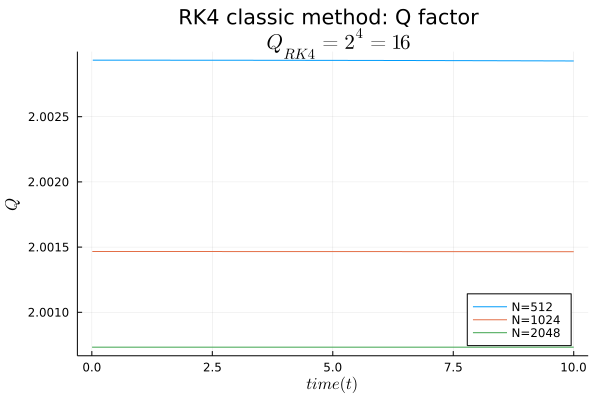

In [4919]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### PLOTEAMOS LOS RESULTADOS PARA DISTINTOS N
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt=plot()
plot!(plt,t_N1,Q_factor(y_N1,y_N2,y_N3),label="N=512")
plot!(plt,t_N4,Q_factor(y_N4,y_N5,y_N6),label="N=1024")
plot!(plt,t_N7,Q_factor(y_N7,y_N8,y_N9),label="N=2048")
plot!(ylabel="\$Q\$",xlabel="\$time (t)\$")
plot!(plt, legend = :bottomright, title = "RK4 classic method: Q factor \n  \$Q_{RK4}=2^{4}=16 \$")

### Problema 2: ###
**Estabilidad de la solución**

Considere la ecuación
$\frac{dy}{dt} = y - y^2$

Esta ecuación tiene dos puntos estacionarios: $y(t) = 1$ e $y (t) = 0$. Evolucione numéricamente con `y0 = 0:0.1:2` (es decir, con datos iniciales $y_0 = 0, y_0 = 0.1,...,y_0 = 2$). Considere para esto el intervalo temporal $[0, 10]$. Grafique con distintos métodos y valores de N y trate de comprender el comportamiento de la solución.

*Opcional:* Para ver el comportamiento para $y_0$ negativo pruebe con `y0 = (0:-0.1:-0.5)` en el intervalo temporal [0,1].

Consideramos la siguiente ecuación diferencial lineal general

$\frac{dy}{dt} = f(y,t,\lambda_{1,2}) \Rightarrow f(y,t,\lambda_{1,2})=\left( \lambda_{1}y^{2}+\lambda_{2}y \right)=\lambda_{1}y\left( y+\frac{\lambda_{2}}{\lambda_{1}} \right)$

In [4920]:
# Definimos el término derecho de la ODE
function f_vector(y,t,λ)
    fvector = zero(Array{typeof(y[1])}(undef, length(y)))
    for i in 1:length(y)
        fvector[i] = λ[1]*y[i]*(y[i]+λ[2]/λ[1])
    end
    return fvector
end

f_vector (generic function with 1 method)

In [4921]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### DEFINIMOS PARÁMETROS INICALES
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
y0_data=(0.0,2.0,10)    # Intervalo de condiciones inicales y num. de valores diferentes
T=(0.0,10.0);           # Intervalo temporal
λ1=-1;λ2=1;par=(λ1,λ2); # Parámetros del problema (dentro de una tupla)

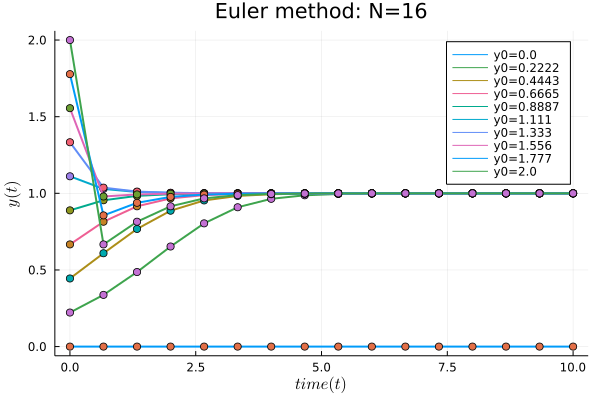

In [4922]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### RESOLVEMOS PARA DISTINTAS CONDICIONES INICIALES Y CON MÉTODO DE EULER
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt = plot()
for i in 1:y0_data[3]
    Δy0=abs(y0_data[2]-y0_data[1])/(y0_data[3]-1);
    y0=y0_data[1]+Δy0*(i-1); # y0={0,~0.1,~0.2,...,2}
    prob_euler=myODEproblem(f_vector,y0,T,par); # definimos el problema
    N=16 # Cantidad de pasos temporales
    dt=(T[2]-T[1])/(N-1); # discretizando con N pasos (dt = |Tfin-Tini|/(N-1))
    # Resolvemos EDO usando el método de Euler
    t,y_euler=myODEsolver(prob_euler,EulerStep,dt=dt);
    plot!(plt,t,y_euler[:,1],label="y0=$(Float16(y0))",lw=2)
    scatter!(plt,t, y_euler[:,1],label ="")
end
plot!(ylabel="\$y(t)\$",xlabel="\$time (t)\$")
plot!(plt,legend=:topright,title="Euler method: N=16")

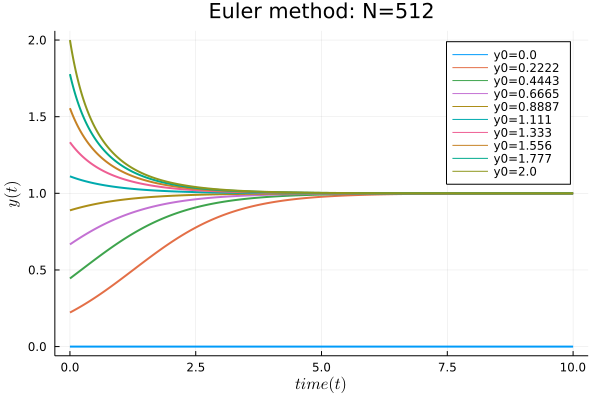

In [4923]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### RESOLVEMOS PARA DISTINTAS CONDICIONES INICIALES Y CON MÉTODO DE EULER
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt = plot()
for i in 1:y0_data[3]
    Δy0=abs(y0_data[2]-y0_data[1])/(y0_data[3]-1);
    y0=y0_data[1]+Δy0*(i-1); # y0={0,~0.1,~0.2,...,2}
    prob_euler=myODEproblem(f_vector,y0,T,par); # definimos el problema
    N=512 # Cantidad de pasos temporales
    dt=(T[2]-T[1])/(N-1); # discretizando con N pasos (dt = |Tfin-Tini|/(N-1))
    # Resolvemos EDO usando el método de Euler
    t,y_euler=myODEsolver(prob_euler,EulerStep,dt=dt);
    plot!(plt,t,y_euler[:,1],label="y0=$(Float16(y0))",lw=2)
    #scatter!(plt,t, y_euler[:,1],label ="")
end
plot!(ylabel="\$y(t)\$",xlabel="\$time (t)\$")
plot!(plt,legend=:topright,title="Euler method: N=512")

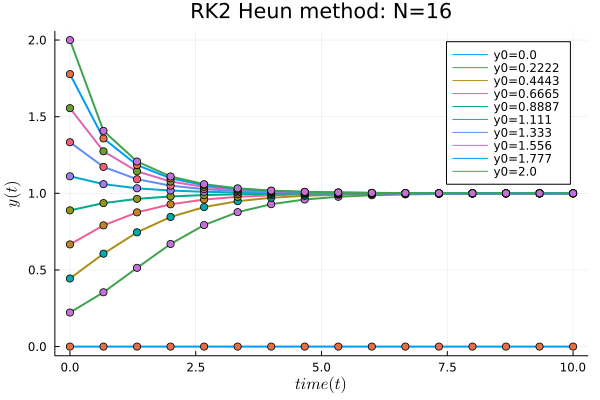

In [4924]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### RESOLVEMOS PARA DISTINTAS CONDICIONES INICIALES Y CON MÉTODO RK2 Heun
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt = plot()
for i in 1:y0_data[3]
    Δy0=abs(y0_data[2]-y0_data[1])/(y0_data[3]-1);
    y0=y0_data[1]+Δy0*(i-1); # y0={0,~0.1,~0.2,...,2}
    prob_euler=myODEproblem(f_vector,y0,T,par); # definimos el problema
    N=16 # Cantidad de pasos temporales
    dt=(T[2]-T[1])/(N-1); # discretizando con N pasos (dt = |Tfin-Tini|/(N-1))
    t,y_RK2_Heun=myODEsolver(prob_euler,RK2step_Heun,dt=dt);
    plot!(plt,t,y_RK2_Heun[:,1],label="y0=$(Float16(y0))",lw=2)
    scatter!(plt,t, y_RK2_Heun[:,1],label ="")
end
plot!(ylabel="\$y(t)\$",xlabel="\$time (t)\$")
plot!(plt,legend=:topright,title="RK2 Heun method: N=16")

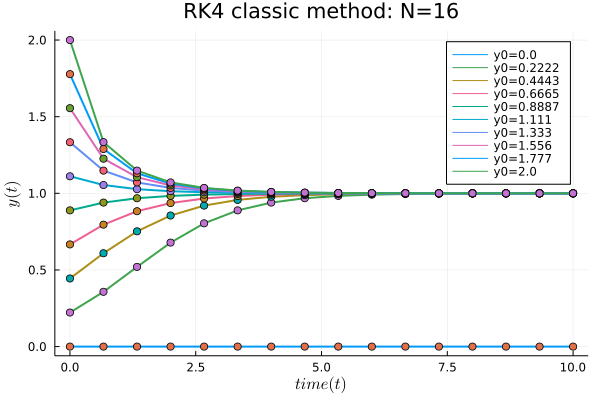

In [4925]:
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
### RESOLVEMOS PARA DISTINTAS CONDICIONES INICIALES Y CON MÉTODO DE RK4 CLASSIC
### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt = plot()
for i in 1:y0_data[3]
    Δy0=abs(y0_data[2]-y0_data[1])/(y0_data[3]-1);
    y0=y0_data[1]+Δy0*(i-1); # y0={0,~0.1,~0.2,...,2}
    prob_euler=myODEproblem(f_vector,y0,T,par); # definimos el problema
    N=16 # Cantidad de pasos temporales
    dt=(T[2]-T[1])/(N-1); # discretizando con N pasos (dt = |Tfin-Tini|/(N-1))
    t,y_RK4=myODEsolver(prob_euler,RK4step,dt=dt);
    plot!(plt,t,y_RK4[:,1],label="y0=$(Float16(y0))",lw=2)
    scatter!(plt,t,y_RK4[:,1],label ="")
end
plot!(ylabel="\$y(t)\$",xlabel="\$time (t)\$")
plot!(plt,legend=:topright,title="RK4 classic method: N=16")

### Problema 3: ###
**Sistemas de ecuaciones**

La ecuación diferencial ordinaria de segundo orden
$$
\dfrac{d^{2}u(t)}{dt^2} = -\alpha^{2} u(t), \quad \alpha > 0
$$

tiene como solución general $u = A\textrm{cos}(\alpha t) +  B\textrm{sen}(\alpha t)$.

Para resolverla numéricamente, podemos convertirla en un sistema de ecuaciones se ordinarias de primer orden definiendo $v = \dfrac{du}{dt}$.

$$
    \begin{array}{c}
    \dfrac{du}{dt} &= &  v \\
    \dfrac{dv}{dt} &= &-\alpha^{2} u
    \end{array}
$$

***3a)*** Considere $$\alpha = 1, \quad u(0) = 1,\quad  v(0) = 0.$$ 
Grafique y compare el desempéño de los distintos métodos con la solución exacta.


*Pista: defina `y0 = [u0, v0]`*

In [4926]:
α=1.0;                        # factor
u0=1.0;v0=0.0;y0=[u0;v0];     # condiciones iniciales
λ1=1.0;λ2=-(α*α);par=(λ1,λ2); # Parámetros del problema (dentro de una tupla)

In [4927]:
# Definimos el término derecho de la ODE
function f_vector(y,t,λ)
    fvector = zero(Array{typeof(y[1])}(undef, length(y)))
    for i in 1:length(y)
        fvector[i] = λ[i]*y[length(y)+1-i]
    end
    return fvector
end

f_vector (generic function with 1 method)

In [4928]:
time_tuple = (0.0, 10.0); # Intervalo temporal (tupla)

#Guardamos los datos en la variable "prob"
prob_euler = myODEproblem(f_vector, y0, time_tuple, par)

prob_RK2Heun = myODEproblem(f_vector, y0, time_tuple, par)
prob_RK2midpoint = myODEproblem(f_vector, y0, time_tuple, par)
prob_RK2Ralston = myODEproblem(f_vector, y0, time_tuple, par)

prob_RK4step = myODEproblem(f_vector, y0, time_tuple, par)

(f_vector, [1.0, 0.0], (0.0, 10.0), (1.0, -1.0))

In [4929]:
N = 100 # Cantidad de pasos temporales
dt = (time_tuple[2]-time_tuple[1])/(N-1) # discretizando con N pasos (dt = |Tfin-Tini|/(N-1))

# Resolvemos EDO usando el método de Euler 
t, y_euler = myODEsolver(prob_euler, EulerStep, dt = dt)

# Resolvemos EDO usando métodos de Runge Kutta de 2do orden 
t, y_RK2Heun = myODEsolver(prob_RK2Heun, RK2step_Heun, dt = dt)             # Heun
t, y_RK2midpoint = myODEsolver(prob_RK2midpoint, RK2step_midpoint, dt = dt) # Midpoint
t, y_RK2Ralston = myODEsolver(prob_RK2Ralston, RK2step_Ralston, dt = dt)    # Ralston

# Resolvemos EDO usando métodos de Runge Kutta de 4to orden  
t, y_RK4step = myODEsolver(prob_RK4step, RK4step, dt = dt)                  # Clásico


([0.0, 0.10101010101010101, 0.20202020202020202, 0.30303030303030304, 0.40404040404040403, 0.5050505050505051, 0.6060606060606061, 0.7070707070707071, 0.8080808080808081, 0.9090909090909091  …  9.09090909090909, 9.191919191919192, 9.292929292929292, 9.393939393939394, 9.494949494949495, 9.595959595959595, 9.696969696969697, 9.797979797979798, 9.8989898989899, 10.0], [1.0 0.0; 0.99490281733178 -0.10083833265141295; … ; -0.889656121199385 0.4566295458500775; -0.8390756193948379 0.5440134615380426])

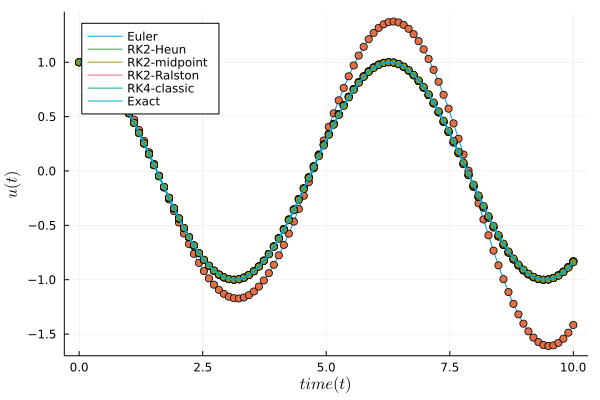

In [4930]:
plt = plot()

plot!(ylabel = "\$u(t)\$", xlabel = "\$time (t)\$")
plot!(plt, legend = :topleft)

plot!(plt, t, y_euler[:,1], label = "Euler")
scatter!(plt, t, y_euler[:,1], label = "")

plot!(plt, t, y_RK2Heun[:,1], label = "RK2-Heun")
scatter!(plt, t, y_RK2Heun[:,1], label = "")
plot!(plt, t, y_RK2midpoint[:,1], label = "RK2-midpoint")
scatter!(plt, t, y_RK2midpoint[:,1], label = "")
plot!(plt, t, y_RK2Ralston[:,1], label = "RK2-Ralston")
scatter!(plt, t, y_RK2Ralston[:,1], label = "")

plot!(plt, t, y_RK4step[:,1], label = "RK4-classic")
scatter!(plt, t, y_RK4step[:,1], label = "")

plot!(plt, t, cos.(t), label = "Exact",lw=2)


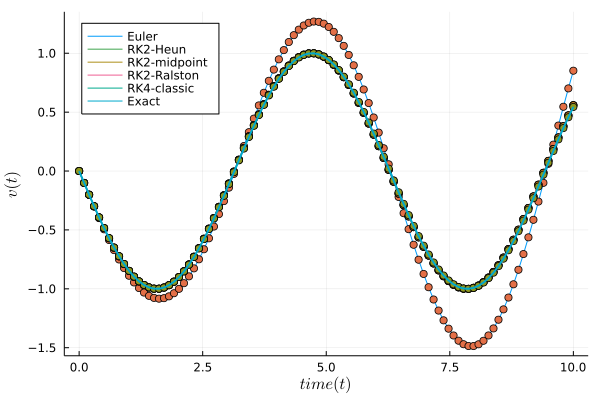

In [4931]:
plt = plot()

plot!(ylabel = "\$v(t)\$", xlabel = "\$time (t)\$")
plot!(plt, legend = :topleft)

plot!(plt, t, y_euler[:,2], label = "Euler")
scatter!(plt, t, y_euler[:,2], label = "")

plot!(plt, t, y_RK2Heun[:,2], label = "RK2-Heun")
scatter!(plt, t, y_RK2Heun[:,2], label = "")
plot!(plt, t, y_RK2midpoint[:,2], label = "RK2-midpoint")
scatter!(plt, t, y_RK2midpoint[:,2], label = "")
plot!(plt, t, y_RK2Ralston[:,2], label = "RK2-Ralston")
scatter!(plt, t, y_RK2Ralston[:,2], label = "")

plot!(plt, t, y_RK4step[:,2], label = "RK4-classic")
scatter!(plt, t, y_RK4step[:,2], label = "")

plot!(plt, t, -sin.(t), label = "Exact",lw=2)

***3b)***

Resuelva ahora el sistema del péndulo físico: 

$$
\frac{d}{dt}\left(
    \begin{array}{c}
    y_1 \\
    y_2
    \end{array}
    \right)
    = 
    \left(
    \begin{array}{c}
    y_2 \\
    -sin(y_1)
    \end{array}
    \right)
$$

con con $y_0 = (0.1,0)$ en el intervalo $t=[0,10]$. 

Grafique las soluciones obtenidas. Use varios métodos y modifique el tamaño del paso temporal. Use otros datos iniciales. 

Vea que la función $E(y) = \frac{1}{2} y_2^2 + (1-cos(y_1))$ es constante a lo largo de la evolución (una *constante del movimiento*) y vea que sucede numericamente. 

In [4932]:
# Definimos el término derecho de la ODE
function f_vector(y,t,λ)
    fvector = zero(Array{typeof(y[1])}(undef, length(y)))
    for i in 1:length(y)
        fvector[i] = λ[i]*y[length(y)+1-i]
        if ((length(y)+1-i)==1) fvector[i]=λ[i]*sin(y[length(y)+1-i]) end;
    end
    return fvector
end

f_vector (generic function with 1 method)

In [4933]:
u0=0.1;v0=0.0;y0=[u0;v0];   # condiciones iniciales
λ1=1.0;λ2=-1.0;par=(λ1,λ2); # Parámetros del problema (dentro de una tupla)

In [4934]:
time_tuple = (0.0, 10.0); # Intervalo temporal (tupla)

#Guardamos los datos en la variable "prob"
prob_euler = myODEproblem(f_vector, y0, time_tuple, par)

prob_RK2Heun = myODEproblem(f_vector, y0, time_tuple, par)
prob_RK2midpoint = myODEproblem(f_vector, y0, time_tuple, par)
prob_RK2Ralston = myODEproblem(f_vector, y0, time_tuple, par)

prob_RK4step = myODEproblem(f_vector, y0, time_tuple, par)

(f_vector, [0.1, 0.0], (0.0, 10.0), (1.0, -1.0))

In [4935]:
N = 32 # Cantidad de pasos temporales
dt = (time_tuple[2]-time_tuple[1])/(N-1) # discretizando con N pasos (dt = |Tfin-Tini|/(N-1))

# Resolvemos EDO usando el método de Euler 
t, y_euler = myODEsolver(prob_euler, EulerStep, dt = dt)

# Resolvemos EDO usando métodos de Runge Kutta de 2do orden 
t, y_RK2Heun = myODEsolver(prob_RK2Heun, RK2step_Heun, dt = dt)             # Heun
t, y_RK2midpoint = myODEsolver(prob_RK2midpoint, RK2step_midpoint, dt = dt) # Midpoint
t, y_RK2Ralston = myODEsolver(prob_RK2Ralston, RK2step_Ralston, dt = dt)    # Ralston

# Resolvemos EDO usando métodos de Runge Kutta de 4to orden  
t, y_RK4step = myODEsolver(prob_RK4step, RK4step, dt = dt)                  # Clásico


([0.0, 0.3225806451612903, 0.6451612903225806, 0.967741935483871, 1.2903225806451613, 1.6129032258064515, 1.935483870967742, 2.258064516129032, 2.5806451612903225, 2.903225806451613  …  7.096774193548387, 7.419354838709677, 7.741935483870968, 8.064516129032258, 8.387096774193548, 8.709677419354838, 9.032258064516128, 9.35483870967742, 9.67741935483871, 10.0], [0.1 0.0; 0.09485057634874074 -0.031648490058978844; … ; -0.09697413083692641 0.024299071676391358; -0.08427697274245641 0.05374476609011142])

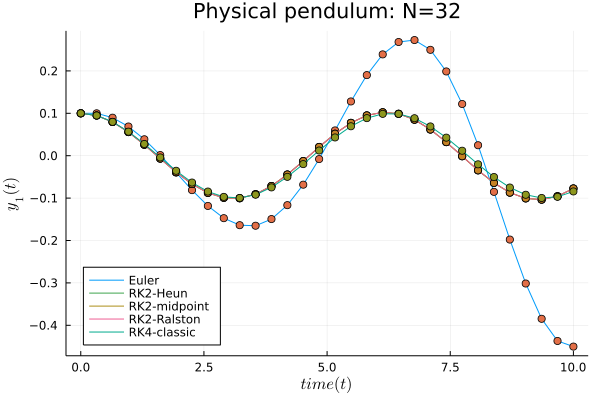

In [4936]:
plt = plot()

plot!(ylabel = "\$y_{1}(t)\$", xlabel = "\$time (t)\$")
plot!(plt, legend = :bottomleft,title="Physical pendulum: N=32")

plot!(plt, t, y_euler[:,1], label = "Euler")
scatter!(plt, t, y_euler[:,1], label = "")

plot!(plt, t, y_RK2Heun[:,1], label = "RK2-Heun")
scatter!(plt, t, y_RK2Heun[:,1], label = "")
plot!(plt, t, y_RK2midpoint[:,1], label = "RK2-midpoint")
scatter!(plt, t, y_RK2midpoint[:,1], label = "")
plot!(plt, t, y_RK2Ralston[:,1], label = "RK2-Ralston")
scatter!(plt, t, y_RK2Ralston[:,1], label = "")

plot!(plt, t, y_RK4step[:,1], label = "RK4-classic")
scatter!(plt, t, y_RK4step[:,1], label = "")

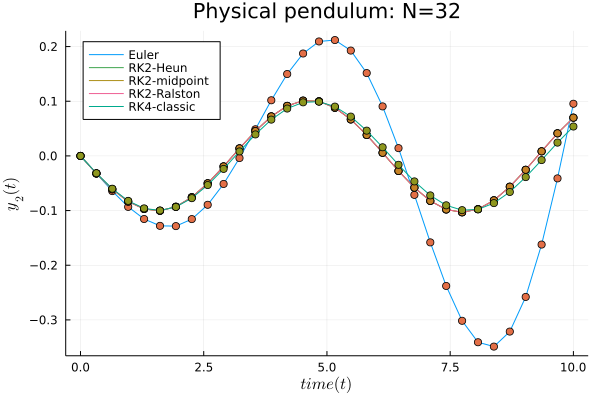

In [4937]:
plt = plot()

plot!(ylabel = "\$y_{2}(t)\$", xlabel = "\$time (t)\$")
plot!(plt, legend = :topleft,title="Physical pendulum: N=32")

plot!(plt, t, y_euler[:,2], label = "Euler")
scatter!(plt, t, y_euler[:,2], label = "")

plot!(plt, t, y_RK2Heun[:,2], label = "RK2-Heun")
scatter!(plt, t, y_RK2Heun[:,2], label = "")
plot!(plt, t, y_RK2midpoint[:,2], label = "RK2-midpoint")
scatter!(plt, t, y_RK2midpoint[:,2], label = "")
plot!(plt, t, y_RK2Ralston[:,2], label = "RK2-Ralston")
scatter!(plt, t, y_RK2Ralston[:,2], label = "")

plot!(plt, t, y_RK4step[:,2], label = "RK4-classic")
scatter!(plt, t, y_RK4step[:,2], label = "")

### Calculamos la energía
$E(y) = \frac{1}{2} y_2^2 + (1-cos(y_1))$

In [4938]:
function energy_physical_pendulum(y_matrix)
    # y_matrix[:,1]≡y1_vector;y_matrix[:,2]≡y2_vector
    E_vector=zero(Array{typeof(y_matrix[1,1])}(undef, length(y_matrix[:,1])))
    for i in 1:length(y_matrix[:,1])
        E_vector[i]=0.5*(y_matrix[i,2]*y_matrix[i,2])+(1.0-cos(y_matrix[i,1]))
    end
    return E_vector
end

energy_physical_pendulum (generic function with 1 method)

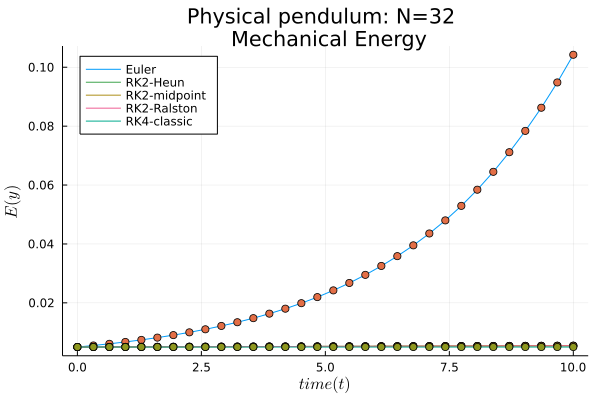

In [4939]:
plt = plot();
plot!(ylabel = "\$E(y)\$", xlabel = "\$time (t)\$");
plot!(plt, legend = :topleft,title="Physical pendulum: N=32 \n Mechanical Energy");

plot!(plt, t, energy_physical_pendulum(y_euler), label = "Euler");
scatter!(plt, t, energy_physical_pendulum(y_euler), label = "");

plot!(plt, t, energy_physical_pendulum(y_RK2Heun), label = "RK2-Heun")
scatter!(plt, t, energy_physical_pendulum(y_RK2Heun), label = "")
plot!(plt, t, energy_physical_pendulum(y_RK2midpoint), label = "RK2-midpoint")
scatter!(plt, t, energy_physical_pendulum(y_RK2midpoint), label = "")
plot!(plt, t, energy_physical_pendulum(y_RK2Ralston), label = "RK2-Ralston")
scatter!(plt, t, energy_physical_pendulum(y_RK2Ralston), label = "")

plot!(plt, t, energy_physical_pendulum(y_RK4step), label = "RK4-classic")
scatter!(plt, t, energy_physical_pendulum(y_RK4step), label = "")